In [1]:
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from VirtualRatModel import VirtualRatModel
from VirtualRatSolver import VirtualRatSolver
from VirtualRatBox import VirtualRatBox
from VirtualRat import VirtualRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

W1108 01:25:08 23831 minpy.dispatch.registry:register:47] Type MXNet for name reshape has already existed
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormatter

In [2]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("RatioTime/RatioTime-0.0-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [3]:
threshold1= 0.9
threshold2=0.7
threshold3 = 0.95
good = np.logical_and(pro_block_matrix[:,-1] > threshold1,  anti_block_matrix[:,-1] > threshold1)
bad = np.logical_not(good)
criteria1 = np.logical_or(pro_switch_matrix[:,40] < threshold2, anti_switch_matrix[:,40] < threshold2)
criteria2 = np.logical_or(pro_switch_matrix[:,95] < threshold3, anti_switch_matrix[:,95] < threshold3)
late = np.logical_or(criteria1,criteria2)
good_late = np.logical_and(good, late)
early = np.logical_not(late)
good_early = np.logical_and(good, early)

bad_pro_block = pro_block_matrix[bad,:]
bad_anti_block = anti_block_matrix[bad,:]
bad_pro_switch = pro_switch_matrix[bad,:]
bad_anti_switch = anti_switch_matrix[bad,:]
bad_matrices = [bad_pro_block, bad_pro_switch, 
                bad_anti_block, bad_anti_switch]

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]

late_pro_block = pro_block_matrix[good_late,:]
late_anti_block = anti_block_matrix[good_late,:]
late_pro_switch = pro_switch_matrix[good_late,:]
late_anti_switch = anti_switch_matrix[good_late,:]
late_matrices = [late_pro_block, late_pro_switch, 
                late_anti_block, late_anti_switch]

early_pro_block = pro_block_matrix[good_early,:]
early_anti_block = anti_block_matrix[good_early,:]
early_pro_switch = pro_switch_matrix[good_early,:]
early_anti_switch = anti_switch_matrix[good_early,:]
early_matrices = [early_pro_block, early_pro_switch, 
                early_anti_block, early_anti_switch]

In [4]:
print pro_block_matrix.shape
print good_pro_block.shape
print late_pro_block.shape
print early_pro_block.shape

(100, 101)
(92, 101)
(32, 101)
(60, 101)


In [5]:
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(0,6000), xlim2=(9000,10000))
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = late_matrices, individual = False, xlim1=(0,6000), xlim2=(9000,10000))
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = early_matrices, individual = False,  xlim1=(0,6000), xlim2=(9000,10000))

/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


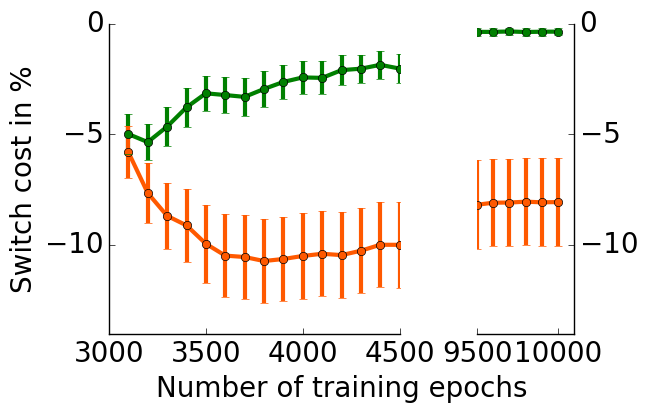

In [6]:
switch_cost_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(3000,4500),\
                    xlim2=(9500,10100), ylim= [-14,0], filename="p2a=0.pdf")

In [7]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("RatioTime/RatioTime-1.0-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [8]:
threshold1= 0.9
threshold2=0.7
threshold3 = 0.95
good = np.logical_and(pro_block_matrix[:,-1] > threshold1,  anti_block_matrix[:,-1] > threshold1)
bad = np.logical_not(good)
criteria1 = np.logical_or(pro_switch_matrix[:,40] < threshold2, anti_switch_matrix[:,40] < threshold2)
criteria2 = np.logical_or(pro_switch_matrix[:,95] < threshold3, anti_switch_matrix[:,95] < threshold3)
late = np.logical_or(criteria1,criteria2)
good_late = np.logical_and(good, late)
early = np.logical_not(late)
good_early = np.logical_and(good, early)

bad_pro_block = pro_block_matrix[bad,:]
bad_anti_block = anti_block_matrix[bad,:]
bad_pro_switch = pro_switch_matrix[bad,:]
bad_anti_switch = anti_switch_matrix[bad,:]
bad_matrices = [bad_pro_block, bad_pro_switch, 
                bad_anti_block, bad_anti_switch]

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]

late_pro_block = pro_block_matrix[good_late,:]
late_anti_block = anti_block_matrix[good_late,:]
late_pro_switch = pro_switch_matrix[good_late,:]
late_anti_switch = anti_switch_matrix[good_late,:]
late_matrices = [late_pro_block, late_pro_switch, 
                late_anti_block, late_anti_switch]

early_pro_block = pro_block_matrix[good_early,:]
early_anti_block = anti_block_matrix[good_early,:]
early_pro_switch = pro_switch_matrix[good_early,:]
early_anti_switch = anti_switch_matrix[good_early,:]
early_matrices = [early_pro_block, early_pro_switch, 
                early_anti_block, early_anti_switch]

In [9]:
print pro_block_matrix.shape
print good_pro_block.shape
print late_pro_block.shape
print early_pro_block.shape

(100, 101)
(92, 101)
(27, 101)
(65, 101)


In [10]:
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(0,6000), xlim2=(9000,10000))
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = late_matrices, individual = False, xlim1=(0,6000), xlim2=(9000,10000))
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = early_matrices, individual = False,  xlim1=(0,6000), xlim2=(9000,10000))

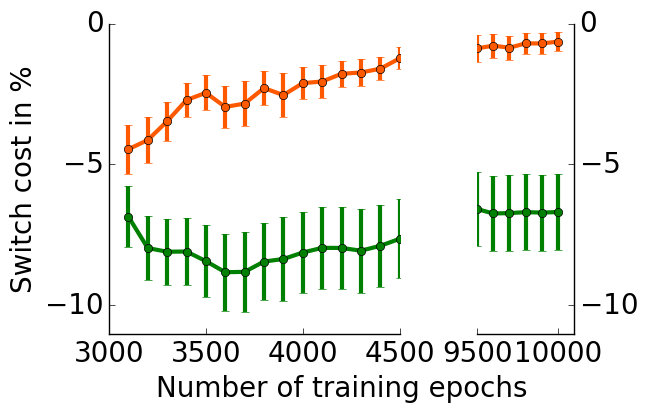

In [11]:
switch_cost_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(3000,4500),\
                    xlim2=(9500,10100), ylim= [-11,0], filename="p2a=1.pdf")